In [1]:
import os
import pandas as pd
import numpy as np

import nibabel as nib
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.ndimage import binary_dilation, convolve

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, balanced_accuracy_score

# NSS predictions

In [5]:
saving_dir = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models/freesurfer/20241002_nss_sex_age_stratification"
textures = ["area", "curv", "thickness"]
label = "NSS"

In [6]:
results = pd.concat([pd.read_csv(os.path.join(saving_dir, f"texture-{txt}_model-lrl2_label-{label}.csv")) for txt in textures], axis=0)

In [7]:
results

,label,texture,fold,split,metric,value
0,NSS,area,0,train,r2,1.000000
1,NSS,area,0,train,rmse,0.002223
2,NSS,area,0,train,mae,0.001687
3,NSS,area,0,test,r2,-0.072261
4,NSS,area,0,test,rmse,8.721438
...,...,...,...,...,...,...
55,NSS,thickness,9,train,rmse,0.000004
56,NSS,thickness,9,train,mae,0.000003
57,NSS,thickness,9,test,r2,-0.198178
58,NSS,thickness,9,test,rmse,5.012460


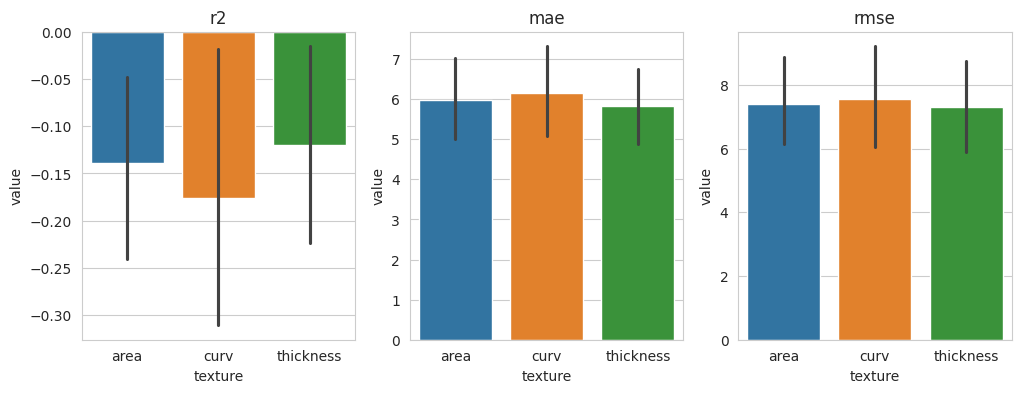

In [13]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(4*3, 4))
    for i, metric in enumerate(["r2", "mae", "rmse"]):
        sns.barplot(data=results[(results["metric"] == metric) & (results["split"] == "test")], x="texture", y="value", hue="texture", order=textures, hue_order=textures, ax=ax[i])
        ax[i].set_title(metric)
plt.show()

# Only NSS score for stratification

In [4]:
textures = ["area", "curv", "thickness"]
label = "NSS"

In [5]:
saving_dir = "/neurospin/psy_sbox/analyses/2023_pauriau_EarlyBrainMarkersWithContrastiveAnalysis/models/freesurfer/20241007_nss_stratification"
results = pd.concat([pd.read_csv(os.path.join(saving_dir, f"texture-{txt}_model-lrl2_label-{label}.csv")) for txt in textures], axis=0)

In [6]:
results

,label,texture,fold,split,metric,value
0,NSS,area,0,train,r2,1.000000
1,NSS,area,0,train,rmse,0.000004
2,NSS,area,0,train,mae,0.000003
3,NSS,area,0,test,r2,0.002833
4,NSS,area,0,test,rmse,6.566393
...,...,...,...,...,...,...
55,NSS,thickness,9,train,rmse,0.002489
56,NSS,thickness,9,train,mae,0.001910
57,NSS,thickness,9,test,r2,0.165499
58,NSS,thickness,9,test,rmse,6.199470


In [8]:
results.loc[results["split"] == "test", ["texture", "metric", "value"]].groupby(["texture", "metric"]).describe([0.5])

value                                                   
                 count      mean       std       min       50%        max
texture   metric                                                         
area      mae     10.0  5.836740  0.740087  5.167892  5.603008   7.330269
          r2      10.0  0.008450  0.036739 -0.047854  0.007988   0.053896
          rmse    10.0  7.351627  1.640685  6.076128  6.639412  11.403646
curv      mae     10.0  5.976896  0.888063  5.022553  5.856558   7.861896
          r2      10.0 -0.039154  0.101529 -0.200684 -0.041129   0.119133
          rmse    10.0  7.526626  1.764300  5.921340  6.798106  11.911862
thickness mae     10.0  5.685060  0.930336  4.214799  5.553961   7.193073
          r2      10.0  0.022758  0.139067 -0.259287  0.058237   0.165499
          rmse    10.0  7.269950  1.572012  5.715591  6.803705  10.782977

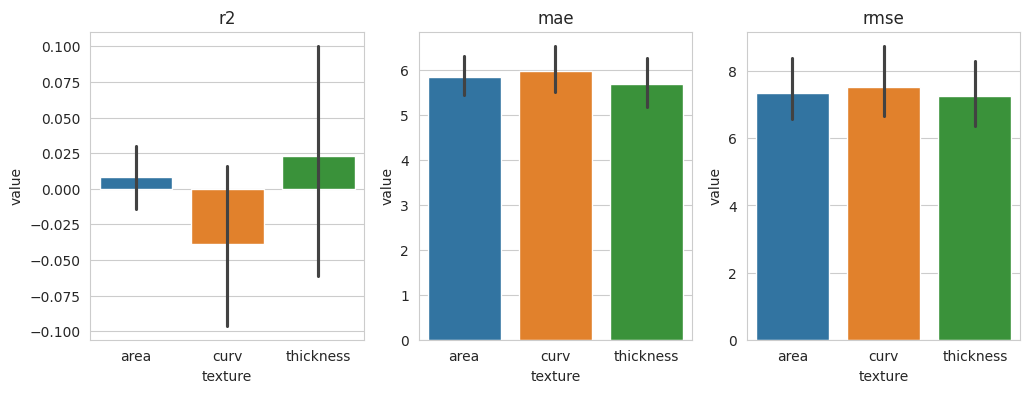

In [7]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(4*3, 4))
    for i, metric in enumerate(["r2", "mae", "rmse"]):
        sns.barplot(data=results[(results["metric"] == metric) & (results["split"] == "test")], x="texture", y="value", hue="texture", order=textures, hue_order=textures, ax=ax[i])
        ax[i].set_title(metric)
plt.show()